 Fix a set of true parameters α and β and not look at them.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.random.uniform(1.0,5.0)
beta = np.random.uniform(0.0,10.0)
theta = np.random.uniform(1.0,5.0)
phi = np.random.uniform(0.0,10.0)

Now we generate n data points according to the relationship laid out in Equation (1). For convenience, let
the x_i’s be generated uniformly at random over the interval [−10, 10].


In [2]:
def grad_func(a, b, x, y):
    n = np.size(x) # number of data points in the data set
    grad_a = 0.0
    grad_b = 0.0
    for i in range(n): # also the number of summation steps
        grad_a = grad_a - 2.0*x[i]*(y[i]-(a*x[i]+b)) # add to the running sum
        grad_b = grad_b - 2.0*(y[i]-(a*x[i]+b))
    grad_a = grad_a/n
    grad_b = grad_b/n
    return grad_a, grad_b

Next, we set the initial estimates as a = b = 100 and the step size to 0.02 and use gradient descent to minimize
the empirical risk. We choose to stop the algorithm when the total of both absolute partial derivatives is
small enough, which we’ll say is less than 0.00001. Therefore, we implement gradient descent as follows:

After the convergence of the gradient descent algorithm, we have our estimates a, b for the true line’s
parameters α, β. (You can check for yourself that you get the same slope and intercept using gradient
descent that you would get from the formulas derived in class.)
We can measure how close these estimated parameters are to the true ones using, say, the quadratic distance:
err= (a − α)^2 + (b − β)^2.

In [3]:
def data_gen(theta, phi, n):
    x = np.random.uniform(-10.0,10.0,n)
    y = np.zeros(n)
    for i in range(n):
        y[i] = theta*x[i]+phi+np.random.uniform(-1.0,1.0)
    return x, y

def experiment_func(theta, phi, n):
    accuracy = np.zeros(8)
    #n = 1
    for k in range(8):
        x, y = data_gen(theta, phi, n+1)
        a = 100.0 # initial estimate for a is 100.0
        b = 100.0 # initial estimate for b is 100.0
        grad_a = 10.0 # initialize grad_a
        grad_b = 10.0 # initialize grad_b
        while abs(grad_a) + abs(grad_b) > 0.00001: # while not converged
            grad_a, grad_b = grad_func(a, b, x, y) # compute the gradient using grad_funca = 
            a = a - grad_a*0.005 # step size = 0.005
            b = b - grad_b*0.005
        accuracy[k] = (a-theta)**2 + (b-phi)**2
    
        #plt.figure() # turn on for Question (c)
        #plt.scatter(x,y, color = 'b')
        #plt.plot([-10.0,10.0], [a*(-10.0)+b,a*10.0+b], color='r')
        #plt.plot([-10.0,10.0], [theta*(-10.0)+phi,theta*10.0+phi], color='k')
        #plt.savefig('lin_reg_scatter ' + str(n) + '.pdf' )
        n = n*2
    return accuracy

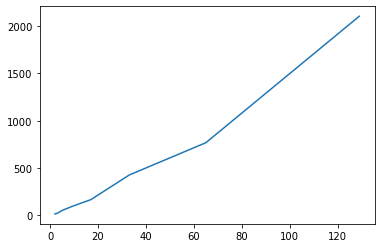

In [6]:
list_of_sizes = [2, 3, 5, 9, 17, 33, 65, 129]
sample_sizes = np.array([])
mean_errors = np.array([])

for n in list_of_sizes:
    accuracies = np.array([])
    for i in range(20):
        accuracy = np.zeros(8)
        accuracy = accuracy + experiment_func(theta, phi, n)
        accuracies = np.append(accuracies, accuracy)
        #accuracy = accuracy/20.0
    sample_sizes = np.append(sample_sizes, n)
    mean_errors = np.append(mean_errors, np.mean(accuracies))
    
plt.plot(sample_sizes, 1/mean_errors)
plt.show()